In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)

In [71]:
import re

In [2]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [3]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [4]:
df = pd.read_json(os.path.join("data", "filmy.json"))
df["Hlavní role"] = df["Hrají"].dropna().apply(lambda x: x[:3])
df["Vedlejší role"] = df["Hrají"].dropna().apply(lambda x: x[3:])
df = df.explode("Hrají")

## Obecná data

In [5]:
len(herectvo["Jméno"].drop_duplicates().to_list())

12115

In [6]:
zijici = herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()]["Jméno"].drop_duplicates().to_list()

In [7]:
len(zijici)

2979

In [8]:
veskere_herectvo = df["Hrají"].drop_duplicates().to_list()

In [9]:
len(veskere_herectvo)

16111

In [10]:
obsazovanost = pd.Series(herectvo.groupby("Jméno")["Film"].nunique(), name="Obsazovanost")

In [11]:
obsazovanost.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     3.0
0.750     4.0
0.900    14.0
0.950    30.0
0.990    73.0
Name: Obsazovanost, dtype: float64

In [12]:
obsazovanost2 = pd.Series(df.groupby("Hrají")["Film"].nunique(), name="Obsazovanost 2")

In [13]:
obsazovanost2.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     2.0
0.750     3.0
0.900    10.0
0.950    22.0
0.990    62.0
Name: Obsazovanost 2, dtype: float64

In [14]:
q = obsazovanost2.quantile(0.95)
q

22.0

In [15]:
q2 = obsazovanost2.quantile(0.99)
q2

62.0

## Nejdelší a nejplodnější kariéry

In [16]:
hraji = df[["Film","Copyright","Hrají"]].explode("Hrají")

In [17]:
hraji = hraji.merge(persony, left_on="Hrají", right_on="Jméno")

In [18]:
hraji["Věk"] = hraji["Copyright"] - hraji["Rok narození"]

In [19]:
delka_kariery = pd.Series(hraji.groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Jiřina Bohdalová (2878)       79
František Kovářík (126912)    77
Zdenka Procházková (42989)    75
Jára Kohout (4846)            73
Zita Kabátová (839)           73
Miroslav Mráz (125568)        71
Jiří Novotný (9283)           69
Svatopluk Beneš (13617)       69
Ladislav Chudík (14421)       68
Jaroslava Adamová (11226)     68
Name: Délka kariéry, dtype: int64

In [20]:
delka_kariery = pd.Series(hraji[~(hraji["Rok úmrtí"] <= (hraji["Copyright"]) - 1)].groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Jiřina Bohdalová (2878)       79.0
Zdenka Procházková (42989)    75.0
Zita Kabátová (839)           73.0
Jára Kohout (4846)            72.0
František Kovářík (126912)    70.0
Jiří Novotný (9283)           69.0
Svatopluk Beneš (13617)       69.0
Jaroslava Adamová (11226)     68.0
Vladimír Brabec (3858)        67.0
Lubomír Lipský (9728)         67.0
Name: Délka kariéry, dtype: float64

In [76]:
def jen_id(x):
    return re.search("\([\w]*\)", x).group(0)[1:-1]

In [77]:
jen_id("Lubomír Lipský (9728)")

'9728'

In [78]:
hraji["Id"] = hraji["Hrají"].apply(lambda x: jen_id(x))

In [80]:
hraji.groupby("Id")["Film"].nunique().nlargest(10)

Id
55928     281
37366     254
64088     214
9550      208
4735      181
127491    169
12725     166
28799     166
4897      161
2576      152
Name: Film, dtype: int64

In [21]:
hraji.groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan W. Speerger (55928)        281
Theodor Pištěk (37366)         254
Eman Fiala (64088)             214
Jaroslav Marvan (9550)         208
František Filipovský (4735)    181
Alois Dvorský (127491)         169
Milka Balek-Brodská (28799)    166
Oldřich Velen (12725)          166
Josef Kemr (4897)              161
Jaroslav Tomsa (2576)          152
Name: Film, dtype: int64

In [22]:
hraji.groupby(["Hrají","Copyright"])["Film"].nunique().nlargest()

Hrají                    Copyright
Jan W. Speerger (55928)  1937         21
Theodor Pištěk (37366)   1937         20
                         1938         20
Jan W. Speerger (55928)  1938         19
Karel Veverka (126788)   1937         19
Name: Film, dtype: int64

In [23]:
vsechno_herectvo = df["Hrají"].drop_duplicates().to_list()

In [24]:
nejaktivnejsich500 = hraji.groupby("Copyright")["Film"].nunique().nlargest(500).index.to_list()

<AxesSubplot:xlabel='Copyright'>

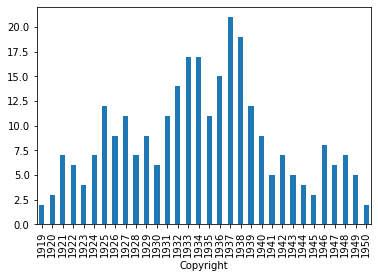

In [25]:
hraji[hraji["Hrají"] == "Jan W. Speerger (55928)"].groupby("Copyright")["Film"].nunique().plot.bar()

In [26]:
hraji[(~hraji["Datum narození"].isnull()) & hraji["Datum úmrtí"].isnull()].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan Kuželka (1445)            116
Jiří Lábus (838)              100
Jan Přeučil (4990)             94
Karel Hábl (27177)             93
Jan Kraus (1062)               84
Jiří Krampol (4985)            83
Oldřich Vlach (14387)          78
Jiřina Bohdalová (2878)        76
Jitka Zelenohorská (34821)     74
Ondřej Vetchý (836)            74
Name: Film, dtype: int64

In [27]:
hraji[hraji["Hrají"] == "Jiřina Bohdalová (2878)"][["Copyright","Film","Věk"]].sort_values(by="Copyright").head(10)

,Copyright,Film,Věk
21367,1937,Pižla a Žižla na cestách (395752),6.0
21368,1939,Zlatý člověk (395859),8.0
21369,1940,Babička (395928),9.0
21370,1940,Dceruška k pohledání (395926),9.0
21371,1940,Madla zpívá Evropě (395922),9.0
21372,1947,Muzikant (396045),16.0
21373,1952,Únos (396149),21.0
21374,1955,Direktiva (396228),24.0
21375,1955,Něco se tu změnilo (396202),24.0
21380,1956,Vina Vladimíra Olmera (396248),25.0


## Další rekordy

In [28]:
hraji[hraji["Věk"] <= 18].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Salač (126323)        21
Vladimír Bejval (15695)        17
Filip Renč (558)               15
Vladimír Zátka (128952)        15
Josef Kemr (4897)              14
Michael Hofbauer (13613)       14
Josef Filip (127149)           13
Zuzana Ondrouchová (126513)    13
Andrea Čunderlíková (14417)    12
Jan Kraus (1062)               12
Name: Film, dtype: int64

In [29]:
hraji[hraji["Věk"] <= 12].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Zátka (128952)    11
Jan Kreidl (128115)        10
Josef Filip (127149)       10
Tomáš Holý (27091)         10
Vladimír Bejval (15695)    10
Dagmar Appelová (28474)     9
Hanuš Bor (7070)            9
Lukáš Bech (23548)          9
Michal Koblic (128743)      9
Filip Renč (558)            8
Name: Film, dtype: int64

In [30]:
hraji[hraji["Věk"] >= 67].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josef Střecha (55613)        68
Vlastimila Vlková (27109)    55
Alois Dvorský (127491)       47
Josef Oliak (128024)         41
Antonín Soukup (87404)       37
Marie Rosůlková (4751)       36
Vladimír Hlavatý (34999)     36
Josef Příhoda (128694)       35
Bohdan Lachman (128508)      34
Slávka Hamouzová (84688)     34
Name: Film, dtype: int64

## Kolegové

In [31]:
df["Spoluherectvo"] = df["Film"].map(df.groupby("Film")["Hrají"].agg(list))

In [32]:
def kolegove(jmeno):
    kolegove = df[df["Hrají"] == jmeno]["Spoluherectvo"].to_list()
    kolegove2 = [item for kolegove in kolegove for item in kolegove]
    kolegove = []
    for k in kolegove2:
        if k not in kolegove:
            kolegove.append(k)
    return(kolegove)

In [33]:
len(kolegove("Jiřina Bohdalová (2878)"))

1230

In [34]:
spoluherci = {}
for n in nejaktivnejsich500:
    spoluherci[n] = len(kolegove(n))
spoluherci = pd.Series(spoluherci)

In [35]:
spoluherci.sort_values(ascending=False).head(30)

1937    0
2021    0
1941    0
2006    0
1996    0
2004    0
2005    0
1993    0
1953    0
1944    0
1920    0
1949    0
1954    0
2000    0
1994    0
1964    0
2010    0
1952    0
1998    0
1995    0
1931    0
1999    0
1948    0
1928    0
2002    0
2017    0
1985    0
1932    0
2020    0
1930    0
dtype: int64

## Červí díry

In [36]:
prvni = hraji["Copyright"].min()
posledni = [hraji["Copyright"].max(), hraji["Copyright"].max()-1]

In [37]:
prvni_herectvo = hraji[hraji["Copyright"] == prvni]["Hrají"].drop_duplicates().to_list()
prvni_herectvo

['Josef Šváb-Malostranský (55291)',
 'Ferdinand Gýra (60351)',
 'Marie Kříženecká (99776)']

In [38]:
posledni_herectvo = hraji[hraji["Copyright"].isin(posledni)]["Hrají"].drop_duplicates().to_list()
posledni_herectvo

['Jan Kačer (1165)',
 'Iva Janžurová (1049)',
 'Pavel Nový (510)',
 'Zdeněk Dušek (993)',
 'Petr Štěpánek (5406)',
 'Miroslav Vladyka (513)',
 'Taťjana Medvecká (7064)',
 'Boleslav Polívka (1556)',
 'Luděk Sobota (15687)',
 'Roman Skamene (6363)',
 'Ivo Strangmüller (4401)',
 'Daniela Kolářová (1847)',
 'Jiří Bartoška (827)',
 'Jan Kuželka (1445)',
 'Jiří Lábus (838)',
 'Alois Švehlík (6277)',
 'Zuzana Bydžovská (4683)',
 'Otakar Brousek ml. (2989)',
 'Milan Šteindler (1572)',
 'František Ringo Čech (11726)',
 'Uršula Kluková (12475)',
 'Vlasta Žehrová (2776)',
 'Daniela Vacková (27460)',
 'Tomáš Hanák (198)',
 'Vlastimil Venclík (27245)',
 'Petr Drozda (1502)',
 'Miroslav Donutil (7954)',
 'Pavel Zatloukal (1580)',
 'Vladimír Hauser (12684)',
 'Martin Havelka (28167)',
 'Luboš Veselý (6013)',
 'Ondřej Vetchý (836)',
 'Ondřej Pavelka (6299)',
 'Jaromír Dulava (1837)',
 'Josef Hervert (8025)',
 'Lukáš Vaculík (3864)',
 'Dušan Sitek (4089)',
 'Sabina Remundová (1423)',
 'Eva Holubová (59

In [39]:
cervi_diry = []
cervi_filmy = []
for n in vsechno_herectvo:
    spolu = kolegove(n)
    for x in prvni_herectvo:
        if x in spolu:
            for y in posledni_herectvo:
                if y in spolu:
                    print(f"{n}, {x}, {y}")
                    n_filmy = df[df["Hrají"] == n]["Film"].drop_duplicates().to_list()
                    y_filmy = df[df["Hrají"] == y]["Film"].drop_duplicates().to_list()
                    z_filmy = []
                    for nf in n_filmy:
                        if nf in y_filmy:
                            z_filmy.append(nf)
                            cervi_filmy.append(nf)
                    print(z_filmy)
                    print("***")
                    if n not in cervi_diry:
                        cervi_diry.append(n)

Jarmila Kronbauerová (128121), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
Bedřich Vrbský (83528), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kačer (1165)
['Údolí včel (396722)', 'Velká neznámá (396861)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Kuřata na cestách (396497)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Petr Štěpánek (5406)
['Údolí včel (396722)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Taťjana Medvecká (7064)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Na samotě u lesa (397110)']
***
František Kovářík (126912), 

['Julek (397243)']
***
Ela Poznerová (126572), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Všichni musí být v pyžamu (397486)']
***
Ela Poznerová (126572), Josef Šváb-Malostranský (55291), Roman Skamene (6363)
['Svět otevřený náhodám (396960)']
***
Ela Poznerová (126572), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Léto s kovbojem (397114)']
***
Ela Poznerová (126572), Josef Šváb-Malostranský (55291), Petr Drozda (1502)
['Všichni musí být v pyžamu (397486)']
***
Frank Argus (28475), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Ať žije republika (396660)']
***
Marie Nademlejnská (127317), Josef Šváb-Malostranský (55291), Zdeněk Dušek (993)
['Jak se kalí ocel (396571)']
***
Josef Steigl (128760), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Handlíři (396548)']
***
Ela Šárková (126039), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Přátelé bermudského trojúhelníku (397557)']
***
Ela Šárková (126039), Josef Šváb-Malostranský (55291), Z

In [40]:
cervi_diry

['Jarmila Kronbauerová (128121)',
 'Bedřich Vrbský (83528)',
 'František Kovářík (126912)',
 'Eman Fiala (64088)',
 'Antonín Meisner (127732)',
 'L. H. Struna (126711)',
 'Marta Májová (127723)',
 'Václav Vydra ml. (126535)',
 'Vladimír Hlavatý (34999)',
 'Alois Dvorský (127491)',
 'Václav Wasserman (37326)',
 'Jára Kohout (4846)',
 'Zdeněk Štěpánek (87457)',
 'Jaroslav Marvan (9550)',
 'Darja Hajská (35228)',
 'Ela Poznerová (126572)',
 'Frank Argus (28475)',
 'Marie Nademlejnská (127317)',
 'Josef Steigl (128760)',
 'Ela Šárková (126039)',
 'Světla Svozilová (126470)',
 'Nataša Gollová (36491)']

In [41]:
cervi_diry_ciste = []
for c in cervi_diry:
    c = c.split(" (")[0]
    cervi_diry_ciste.append(c)
print(", ".join(cervi_diry_ciste))

Jarmila Kronbauerová, Bedřich Vrbský, František Kovářík, Eman Fiala, Antonín Meisner, L. H. Struna, Marta Májová, Václav Vydra ml., Vladimír Hlavatý, Alois Dvorský, Václav Wasserman, Jára Kohout, Zdeněk Štěpánek, Jaroslav Marvan, Darja Hajská, Ela Poznerová, Frank Argus, Marie Nademlejnská, Josef Steigl, Ela Šárková, Světla Svozilová, Nataša Gollová


In [42]:
len(cervi_diry)

22

In [43]:
cervi_filmy

['Čintamani & podvodník (396606)',
 'Čintamani & podvodník (396606)',
 'Údolí včel (396722)',
 'Velká neznámá (396861)',
 '„Marečku, podejte mi pero!“ (397112)',
 'Kuřata na cestách (396497)',
 'Údolí včel (396722)',
 '„Marečku, podejte mi pero!“ (397112)',
 'Na samotě u lesa (397110)',
 'Vítězný lid (397143)',
 '„Marečku, podejte mi pero!“ (397112)',
 'Faunovo velmi pozdní odpoledne (397404)',
 'Hledá se táta! (396457)',
 'Handlíři (396548)',
 'Volejte Martina (396639)',
 'U telefonu Martin (396686)',
 'U telefonu Martin (396686)',
 'Akce v Istanbulu (397084)',
 'Handlíři (396548)',
 'Tátova škola (396561)',
 'Zbraně pro Prahu (397041)',
 'Zbraně pro Prahu (397041)',
 'Handlíři (396548)',
 'Zabil jsem Einsteina, pánové... (396812)',
 'Probuzení (396364)',
 'Znamení Raka (396675)',
 'Nejlepší ženská mého života (396785)',
 'Zabil jsem Einsteina, pánové... (396812)',
 'Bouřlivé víno (397122)',
 'Což takhle dát si špenát (397165)',
 'Zralé víno (397335)',
 'Velká filmová loupež (397520)'

In [44]:
hraji[hraji["Hrají"].isin(cervi_diry)].groupby("Copyright")["Rok úmrtí"].max().sort_values()

Copyright
1916    1966.0
1918    1975.0
1924    1975.0
1919    1980.0
1920    1980.0
         ...  
1944    1994.0
1947    1994.0
1994    1994.0
1934    1994.0
1995    1994.0
Name: Rok úmrtí, Length: 76, dtype: float64

## Nejvíc oskarových filmů

In [45]:
oskari = ['Obchod na korze (396649)', 'Ostře sledované vlaky (396694)', 'Kolja (9013)']

In [46]:
df[df["Film"].isin(oskari)].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Adam Matejka (126967)        1
Alois Vachek (130102)        1
Andrej Chalimon (37311)      1
Andrej Šilan (59766)         1
Bohumil Cajthaml (130273)    1
Name: Film, dtype: int64

In [47]:
oskarianominace = ['Obchod na korze (396649)','Lásky jedné plavovlásky (396651)','Ostře sledované vlaky (396694)','Hoří, má panenko (396750)','Kolja (9013)','Vesničko má středisková (397480)','Obecná škola (397700)','Želary (13452)']

In [48]:
df[df["Film"].isin(oskarianominace)].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Milada Ježková (79014)      4
Libuše Šafránková (2272)    3
Zdeněk Svěrák (1892)        3
Jan Tříska (4834)           2
Jan Vostrčil (11100)        2
Name: Film, dtype: int64

In [49]:
df[(df["Film"].isin(oskarianominace) & (df["Hrají"] == "Milada Ježková (79014)"))]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby,Hlavní role,Vedlejší role,Spoluherectvo
1975,Lásky jedné plavovlásky (396651),Československo,1965,1965,festivalová premiéra srpen 1965 (26. mezináro...,77.0,Miloš Forman (7872),film,"[komedie, hořká komedie]","[hraný, distribuční]",Lásky jedné plavovlásky,Lásky jedné plavovlásky,Loves of a Blonde,None,Přihořívá / Láska jako prám,Milada Ježková (79014),"[Andula, klavírista Míla Vašata, záložák Vacov...",Ivan Passer (7890),None,"[Jaroslav Papoušek (4930), Ivan Passer (7890),...","[Jaroslav Papoušek (4930), Ivan Passer (7890),...",Václav Šašek (1766),Miroslav Ondříček (3524),Rudolf Blaháček (14330),Karel Černý (1241),None,Rudolf Hammer (5119),Miroslav Hájek (54607),Adolf Böhm (126000),None,Rudolf Hájek (12756),Jaroslav Solnička (85467),None,[Evžen Illín (27434)],None,[],Filmová komedie se sestrou Jany Brejchové v hl...,Filmové studio Barrandov,None,Státní fond kinematografie,"[Ústřední půjčovna filmů (původní 1965), Národ...",dlouhometrážní,"[16mm, 35mm, DCP 2-D, BRD]",1.37,černobílý,zvukový,mono,česká,česky,bez titulků,české,Druhý celovečerní film Miloše Formana (natočen...,"Dívka s kytarou zpívá šlágr To, co bylo včera,...",Miloš Forman (7872),None,None,None,None,None,None,[Johann Sebastian Bach (6661)],None,2195.0,None,[Vítěz Akce: Anketa filmových kritiků o nejlep...,Národní filmový archiv archivuje také 9. díl N...,None,None,None,None,None,None,None,None,None,None,None,"[Orchestr Karla Vlacha (2852), Karel Vlach (22...",None,None,Vladimír Mácha (127847),"[Pavla Marková (36607), Jaromír Komárek (22275)]",None,None,Ladislav Chroust (59307),None,None,None,None,"[Muži z Ria, Smích /Chi Chi/, Hej, panímámo, T...",schválení literárního scénáře 13. 5. 1964 ...,None,None,None,None,None,None,bez ateliérů,None,None,None,None,None,None,None,None,None,None,None,Miloš Červinka (31108),None,None,Jaroslav Vlk (130440),Lilian Havlíčková (66986),"Zdena Šnajdarová (31117), Emilie Fišarová (20249)",Jitka Šulcová (129636),None,None,None,"Národní filmový archiv, Obchodní oddělení",None,None,"Tvůrčí skupina Šebor – Bor, Vladimír Bor (vedo...",None,None,None,None,None,None,None,1965,1965,"[Hana Brejchová (81393), Vladimír Pucholt (222...","[Jiří Hrubý (59333), Milada Ježková (79014), J...","[Hana Brejchová (81393), Vladimír Pucholt (222..."
2038,Ostře sledované vlaky (396694),Československo

## Hlavní a vedlejší role

In [50]:
hvezdnost = pd.Series(df.explode("Hlavní role").groupby("Hlavní role")["Film"].nunique() / df.explode("Hrají").groupby("Hrají")["Film"].nunique(), name="Hvězdnost")

In [51]:
hvezdy = pd.DataFrame([hvezdnost, obsazovanost]).transpose()

In [52]:
hvezdy

,Hvězdnost,Obsazovanost
(person),NaN,NaN
Ajala (77698),NaN,NaN
Baky (13703),NaN,NaN
Bohemia Big Band (18563),NaN,NaN
Boni Pueri (22837),NaN,NaN
...,...,...
skupina Golem (34054),NaN,1.0
Útvar rychlého nasazení (102657),NaN,1.0
Čestmír Řanda st. (36487),NaN,60.0
Šarlota Frantinová (122105),NaN,1.0


In [53]:
hvezdy[hvezdy["Obsazovanost"] >= q].sort_values(by="Hvězdnost", ascending=False).head(50)

,Hvězdnost,Obsazovanost
Vlasta Burian (11992),0.974359,40.0
Suzanne Marwille (127373),0.900000,37.0
Anny Ondráková (127280),0.810811,35.0
Hugo Haas (37289),0.766667,30.0
Karel Lamač (37847),0.698413,60.0
Karel Höger (38146),0.691176,68.0
Anna Geislerová (5433),0.685714,41.0
Tatiana Pauhofová (7594),0.666667,22.0
Jana Brejchová (7710),0.666667,60.0
Oldřich Nový (12009),0.658537,42.0


In [54]:
nejvetsi_hvezdy_c_filmu = hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50).index.to_list()
super_hvezdy = []
for n in nejvetsi_hvezdy_c_filmu:
    n = n.split(" (")[0]
    super_hvezdy.append(n)
print(len(super_hvezdy))
print(", ".join(super_hvezdy))

32
Vlasta Burian, Suzanne Marwille, Anny Ondráková, Hugo Haas, Karel Lamač, Karel Höger, Anna Geislerová, Tatiana Pauhofová, Jana Brejchová, Oldřich Nový, Lída Baarová, Zdeněk Štěpánek, Hana Vítová, Karel Hašler, Tatiana Vilhelmová, Jiří Mádl, Otomar Korbelář, Jiří Vala, Marta Vančurová, Ivan Trojan, Jaromír Hanzlík, Eduard Cupák, Boleslav Polívka, Kryštof Hádek, Václav Voska, Jiří Adamíra, Adina Mandlová, Iva Janžurová, Jiřina Štěpničková, Josef Abrhám, Vladimír Dlouhý, Oldřich Kaiser


In [55]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy.index.isin(zijici))].sort_values(by="Hvězdnost", ascending=False).head(35)

,Hvězdnost,Obsazovanost
Anna Geislerová (5433),0.685714,41.0
Jana Brejchová (7710),0.666667,60.0
Tatiana Pauhofová (7594),0.666667,22.0
Tatiana Vilhelmová (935),0.600000,34.0
Jiří Mádl (18965),0.592593,27.0
Marta Vančurová (5491),0.571429,24.0
Ivan Trojan (6789),0.571429,26.0
Jaromír Hanzlík (14425),0.565217,49.0
Boleslav Polívka (1556),0.564516,62.0
Kryštof Hádek (1830),0.548387,34.0


In [56]:
df = df[["Hrají","Hlavní role","Vedlejší role","Film","Žánr","Copyright"]].explode("Hlavní role").explode("Vedlejší role")

In [57]:
df[df["Vedlejší role"] == "Vlasta Burian (11992)"]["Film"].drop_duplicates().to_list()

['Zaostřit prosím! (396247)']

In [58]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).head(10)

,Hvězdnost,Obsazovanost
Karel Hovorka (76534),NaN,136.0
Vladimír Navrátil (12670),NaN,125.0
Jan Kuželka (1445),NaN,116.0
Zdeněk Srstka (7960),NaN,108.0
Karel Bělohradský (6370),NaN,99.0
Jindřich Narenta (87097),NaN,96.0
Jan Cmíral (125562),NaN,96.0
Zdeněk Skalický (126510),NaN,93.0
Antonín Jirsa (129711),NaN,86.0
Vítězslav Černý (126687),NaN,85.0


In [59]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).shape

(185, 2)

In [60]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (~hvezdy["Hvězdnost"].isnull())].sort_values(by="Hvězdnost", ascending=True).head(10)

,Hvězdnost,Obsazovanost
Jaroslav Tomsa (2576),0.006579,151.0
Jiřina Bílá (3629),0.008696,115.0
Karel Engel (14390),0.009174,94.0
Josef Oliak (128024),0.010417,94.0
Emanuel Hříbal (127758),0.010753,93.0
Josef Steigl (128760),0.012346,79.0
Karel Pavlík (126439),0.012658,81.0
Viktor Maurer (78076),0.013889,75.0
F. X. Mlejnek (128287),0.015385,104.0
Karel Augusta (5058),0.015625,128.0


In [61]:
df[df["Hlavní role"] == "Jaroslav Tomsa (2576)"]["Film"].drop_duplicates().to_list()

['Koncert (397284)']

## Typologie herců

In [62]:
df = df.explode("Žánr")

In [63]:
df = df.replace("černá komedie","komedie").replace("bláznivá komedie","komedie").replace("hořká komedie","komedie").replace("smutná komedie","komedie")

In [64]:
df = df.merge(obsazovanost, left_on="Hrají", right_on="Jméno")

In [65]:
zanry = df["Žánr"].drop_duplicates().to_list()

In [66]:
df.columns

Index(['Hrají', 'Hlavní role', 'Vedlejší role', 'Film', 'Žánr', 'Copyright',
       'Obsazovanost'],
      dtype='object')

In [67]:
for z in zanry:
    print(f"""{z}: {df[df["Žánr"] == z].groupby("Hrají")["Film"].nunique().nlargest(1)}""")

fraška: Hrají
Theodor Pištěk (37366)    9
Name: Film, dtype: int64
anekdota: Hrají
Antonín Kachlík (7880)    1
Name: Film, dtype: int64
komedie: Hrají
Jan W. Speerger (55928)    117
Name: Film, dtype: int64
melodrama: Hrají
Theodor Pištěk (37366)    47
Name: Film, dtype: int64
dobrodružný: Hrají
Radovan Lukavský (3301)    8
Name: Film, dtype: int64
historický: Hrají
Oldřich Velen (12725)    20
Name: Film, dtype: int64
drama: Hrají
Jan W. Speerger (55928)    88
Name: Film, dtype: int64
fantastický: Hrají
Antonín Soukup (87404)    4
Name: Film, dtype: int64
kriminální: Hrají
Jiřina Bílá (3629)    16
Name: Film, dtype: int64
pohádka: Hrají
Jan Skopeček (8252)    10
Name: Film, dtype: int64
osvětový: Hrají
František Šlégr (127637)    4
Name: Film, dtype: int64
tragikomedie: Hrají
Jiří Menzel (7887)    8
Name: Film, dtype: int64
propagační: Hrají
Antonín Jedlička (4739)    3
Name: Film, dtype: int64
špionážní: Hrají
Jan Pohan (7665)    5
Name: Film, dtype: int64
hudební: Hrají
Karel Hovorka

In [68]:
for z in zanry:
    typicke_herectvo = pd.Series(df[(df["Žánr"] == z) & (df["Obsazovanost"] >= q)].groupby("Hrají")["Film"].nunique() / df.groupby("Hrají")["Obsazovanost"].max()).nlargest(10)
    print(z)
    print(typicke_herectvo)
    print("***")

fraška
Hrají
Josef Waltner (126405)             0.138889
Ada Karlovský (85828)              0.128205
Jindřich Adolf (13279)             0.111111
Josef Sládek (18352)               0.111111
Alfred Baštýř (28814)              0.108108
František Beranský (49046)         0.090909
Mario Karas (101579)               0.088235
Josef Rovenský (37766)             0.084507
Josef Šváb-Malostranský (55291)    0.082192
Karel Němec (128590)               0.081967
dtype: float64
***
anekdota
Hrají
Edita Dindělová (27933)      0.045455
Jan Víšek (4757)             0.037037
Vladimír Klemens (128722)    0.034483
Pavla Maršálková (126529)    0.029412
Ilona Jirotková (126679)     0.027027
Tomáš Hanák (198)            0.025000
Jiřina Šejbalová (125559)    0.023256
František Kubíček (87096)    0.020833
Pavel Landovský (1136)       0.020000
Marta Richterová (27358)     0.019608
dtype: float64
***
komedie
Hrají
Vlasta Burian (11992)        0.850000
Hugo Haas (37289)            0.800000
Jára Kohout (4846)      

detektivní
Hrají
Jarmila Orlová (31061)                   0.181818
Božena Böhmová (27878)                   0.166667
Miloš Willig (82925)                     0.145455
Zdeněk Týle (129029)                     0.136364
Bohumil Šmída (31114)                    0.127660
Hana Pastejříková (6130)                 0.125000
Václav Wasserman (37326)                 0.121212
Vladimír Ptáček (126428)                 0.116279
Anna Gabrielová (4949)                   0.115385
Gabriela Bártlová-Buddeusová (127814)    0.109091
dtype: float64
***
trikový
Hrají
Gabriela Osvaldová (4281)    0.045455
Miroslav Krobot (21995)      0.043478
Václav Neužil (9101)         0.040000
Jaromír Nosek (585)          0.038462
Nela Boudová (8226)          0.037037
Pavel Liška (984)            0.035714
Arnošt Goldflam (1579)       0.031250
Jarka Pižla (128001)         0.031250
Jan Vondráček (1713)         0.028571
Miloslav Holub (5166)        0.027778
dtype: float64
***
sociální
Hrají
Frank Rose-Růžička (127740)    0.083

dětský
Hrají
Eva Matalová (2375)          0.391304
Otto Šimánek (35353)         0.308824
Stanislav Tříska (4976)      0.300000
Michael Hofbauer (13613)     0.291667
Václav Babka (28480)         0.220000
Filip Renč (558)             0.200000
Karel Smyczek (611)          0.200000
Otakar Brousek ml. (2989)    0.200000
Pavlína Mourková (2667)      0.200000
Václav Halama (21254)        0.185185
dtype: float64
***
rodinný
Hrají
Václav Neužil (9101)        0.120000
Hynek Čermák (3370)         0.115385
Matěj Hádek (11532)         0.107143
Marek Taclík (9420)         0.096774
Vlasta Žehrová (2776)       0.090909
Martin Faltýn (6096)        0.086957
Otmar Brancuzský (1063)     0.086957
Vanda Hybnerová (937)       0.086957
Naďa Konvalinková (4988)    0.083333
Jana Štěpánková (14419)     0.078947
dtype: float64
***
muzikál
Hrají
Milan Kindl (126442)         0.119048
Oskar Hák (7589)             0.114286
Bert Schneider (126653)      0.103448
Marie Popelková (35279)      0.068966
Jiří Bruder (125486

reportáž
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)                NaN
A. V. Frič (104959)             NaN
A. V. Jarol-Jarolímek (51927)   NaN
A. Černá (44606)                NaN
Aanshal Batnagar (36659)        NaN
Aaron Monaghan (59068)          NaN
Aaron Thomas (33669)            NaN
dtype: float64
***
erotický
Hrají
Jiří Pomeje (3876)           0.125000
Michaela Kuklová (3313)      0.086957
Oldřich Vízner (8257)        0.060606
Mahulena Bočanová (19607)    0.045455
Pavel Pípal (6302)           0.043478
Václav Knop (12652)          0.041667
Blanka Lormanová (14388)     0.040000
Dana Syslová (52427)         0.038462
Nela Boudová (8226)          0.037037
Hanuš Bor (7070)             0.035714
dtype: float64
***
milostný
Hrají
Kryštof Hádek (1830)       0.117647
Martin Stránský (7770)     0.090909
Miroslav Krobot (21995)    0.086957
Ondřej Malý (59148)        0.081081
Jiří Mádl (18965)          0.0740

výukový
Hrají
Miroslav Krobot (21995)          0.043478
Pavel Liška (984)                0.035714
A. M. Brousil (127207)                NaN
A. Pahl (21791)                       NaN
A. Pokorný (21836)                    NaN
A. Ryzák (19930)                      NaN
A. V. Frič (104959)                   NaN
A. V. Jarol-Jarolímek (51927)         NaN
A. Černá (44606)                      NaN
Aanshal Batnagar (36659)              NaN
dtype: float64
***
medailon
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)                NaN
A. V. Frič (104959)             NaN
A. V. Jarol-Jarolímek (51927)   NaN
A. Černá (44606)                NaN
Aanshal Batnagar (36659)        NaN
Aaron Monaghan (59068)          NaN
Aaron Thomas (33669)            NaN
dtype: float64
***
videoklip
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)             

In [69]:
df.groupby("Hrají")["Žánr"].nunique().nlargest()

Hrají
František Filipovský (4735)    38
Jaroslav Tomsa (2576)          38
Josef Kemr (4897)              38
Josef Hlinomaz (26212)         37
Eman Fiala (64088)             34
Name: Žánr, dtype: int64

In [70]:
df.groupby("Hlavní role")["Žánr"].nunique().nlargest()

Hlavní role
Karel Roden (494)              23
Miloš Kopecký (4959)           22
Vlastimil Brodský (833)        22
Jana Brejchová (7710)          21
Rudolf Hrušínský st. (4842)    21
Name: Žánr, dtype: int64